# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_dictionary_list = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print('--- Beginning Data Retrieval ---')

counter = 1

for city in cities:
    print(f"Processing city #{counter} | {city}")
    counter += 1
    query_url = f"{url}appid={api_key}&units={units}&q={city}"

    # 2.) send the order
    # weather_data is the dictionary
    request_data = requests.get(query_url)
    time.sleep(1)
    
    if request_data.status_code == 404:
        print('City not found', city)
    else:
        weather_data = request_data.json()

        weather_dict = {
            'City': weather_data['name'],
            'Cloudiness': weather_data['clouds']['all'],
            'Country': weather_data['sys']['country'],
            'Date': weather_data['dt'],
            'Humidity': weather_data['main']['humidity'],
            'Lat': weather_data['coord']['lat'],
            'Lng': weather_data['coord']['lon'],
            'Max Temp': weather_data['main']['temp_max'],
            'Wind Speed': weather_data['wind']['speed']
        }

        # 4.) Add each dictionary to our empty list, one at a time
        city_dictionary_list.append(weather_dict)
    
print('--- Data Retrieval Complete ---')


--- Beginning Data Retrieval ---
Processing city #1 | mataura
Processing city #2 | atuona
Processing city #3 | illoqqortoormiut
City not found illoqqortoormiut
Processing city #4 | college
Processing city #5 | longfeng
Processing city #6 | hilo
Processing city #7 | khatanga
Processing city #8 | punta arenas
Processing city #9 | yarmouth
Processing city #10 | albany
Processing city #11 | taolanaro
City not found taolanaro
Processing city #12 | gobabis
Processing city #13 | mahebourg
Processing city #14 | kapaa
Processing city #15 | farafenni
Processing city #16 | vaini
Processing city #17 | ushuaia
Processing city #18 | port alfred
Processing city #19 | broome
Processing city #20 | puerto ayora
Processing city #21 | port lincoln
Processing city #22 | norsup
Processing city #23 | kodiak
Processing city #24 | pedernales
Processing city #25 | barrow
Processing city #26 | saint-philippe
Processing city #27 | lebu
Processing city #28 | vaitupu
City not found vaitupu
Processing city #29 | vic

Processing city #239 | srikakulam
Processing city #240 | tacuati
Processing city #241 | babanusah
City not found babanusah
Processing city #242 | youghal
Processing city #243 | tiruchchendur
Processing city #244 | vaitape
Processing city #245 | havoysund
Processing city #246 | shalinskoye
Processing city #247 | ternate
Processing city #248 | san patricio
Processing city #249 | samma
Processing city #250 | nicoya
Processing city #251 | tambilil
Processing city #252 | sokoni
Processing city #253 | ngukurr
City not found ngukurr
Processing city #254 | ambon
Processing city #255 | coahuayana
Processing city #256 | moron
Processing city #257 | losevo
Processing city #258 | cockburn town
Processing city #259 | banda aceh
Processing city #260 | kemijarvi
City not found kemijarvi
Processing city #261 | churapcha
Processing city #262 | skalistyy
City not found skalistyy
Processing city #263 | waingapu
Processing city #264 | maningrida
Processing city #265 | gisborne
Processing city #266 | chimb

Processing city #469 | saint-leu
Processing city #470 | eldorado
Processing city #471 | bambui
Processing city #472 | karaton
Processing city #473 | olafsvik
City not found olafsvik
Processing city #474 | sangar
Processing city #475 | ixtapa
Processing city #476 | duldurga
Processing city #477 | katobu
Processing city #478 | paracuru
Processing city #479 | viligili
City not found viligili
Processing city #480 | volosovo
Processing city #481 | nemuro
Processing city #482 | illapel
Processing city #483 | burnie
Processing city #484 | biak
Processing city #485 | buenaventura
Processing city #486 | surgut
Processing city #487 | samusu
City not found samusu
Processing city #488 | gimli
Processing city #489 | asfi
City not found asfi
Processing city #490 | san quintin
Processing city #491 | chifeng
Processing city #492 | fortuna
Processing city #493 | kondagaon
Processing city #494 | auki
Processing city #495 | anori
Processing city #496 | kununurra
Processing city #497 | mehamn
Processing c

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_dictionary_list

[{'City': 'Mataura',
  'Cloudiness': 100,
  'Country': 'NZ',
  'Date': 1563577359,
  'Humidity': 97,
  'Lat': -46.19,
  'Lng': 168.86,
  'Max Temp': 48,
  'Wind Speed': 5.99},
 {'City': 'Atuona',
  'Cloudiness': 100,
  'Country': 'PF',
  'Date': 1563577360,
  'Humidity': 67,
  'Lat': -9.8,
  'Lng': -139.03,
  'Max Temp': 80.44,
  'Wind Speed': 9.1},
 {'City': 'College',
  'Cloudiness': 90,
  'Country': 'US',
  'Date': 1563577363,
  'Humidity': 45,
  'Lat': 64.86,
  'Lng': -147.8,
  'Max Temp': 68,
  'Wind Speed': 9.17},
 {'City': 'Longfeng',
  'Cloudiness': 100,
  'Country': 'CN',
  'Date': 1563577364,
  'Humidity': 95,
  'Lat': 31.05,
  'Lng': 103.87,
  'Max Temp': 84,
  'Wind Speed': 3.31},
 {'City': 'Hilo',
  'Cloudiness': 75,
  'Country': 'US',
  'Date': 1563577307,
  'Humidity': 54,
  'Lat': 19.71,
  'Lng': -155.08,
  'Max Temp': 84.2,
  'Wind Speed': 10.29},
 {'City': 'Khatanga',
  'Cloudiness': 52,
  'Country': 'RU',
  'Date': 1563577236,
  'Humidity': 44,
  'Lat': 71.98,
  'Lng

In [11]:
# create dataframe from city dictionary list
weather_data_df = pd.DataFrame(city_dictionary_list)

# save dataframe as csv
weather_data_df.to_csv(output_data_file, index=False, header=True)

weather_data_df.count()

City          529
Cloudiness    529
Country       529
Date          529
Humidity      529
Lat           529
Lng           529
Max Temp      529
Wind Speed    529
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

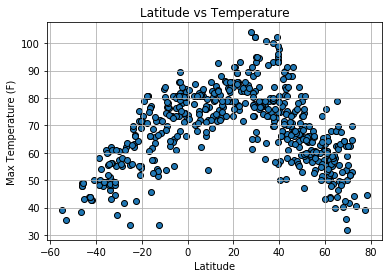

In [7]:
# Extract only the data we need (max temp, latitude)
max_temp_list = weather_data_df['Max Temp']
latitude_list = weather_data_df['Lat']

# Build the graph scatter
plt.scatter(latitude_list, max_temp_list, marker='o', edgecolors='black')

# Modify or Configure the Graph to our Needs
plt.grid(True)
plt.title('Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/LatitudeVsTemp')
plt.show()

#### Latitude vs. Humidity Plot

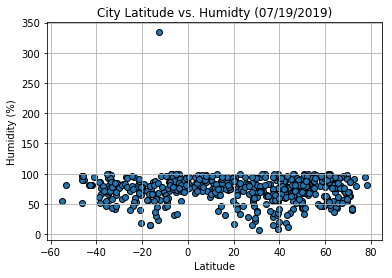

In [8]:
# Extract Humidity
humidity_list = weather_data_df['Humidity']

plt.scatter(latitude_list, humidity_list, edgecolors='black')

plt.grid(True)
plt.title('City Latitude vs. Humidty (07/19/2019)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/CityLatitudeVsHumidity')
plt.show()

#### Latitude vs. Cloudiness Plot

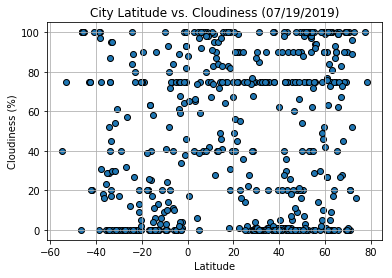

In [9]:
# get cloudiness data
cloudiness_list = weather_data_df['Cloudiness']

plt.scatter(latitude_list, cloudiness_list, edgecolor ='black')

plt.grid(True)
plt.title('City Latitude vs. Cloudiness (07/19/2019)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/CityLatitudeVsCloudiness')
plt.show()

#### Latitude vs. Wind Speed Plot

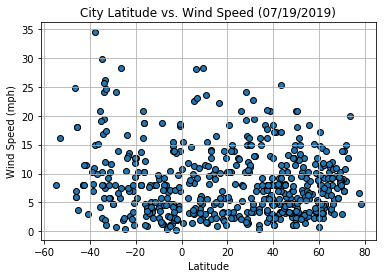

In [10]:
# extract windspeed data
windspeed_list = weather_data_df['Wind Speed']

plt.scatter(latitude_list, windspeed_list, edgecolor = 'black')

plt.title('City Latitude vs. Wind Speed (07/19/2019)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(True)
plt.savefig('output_data/CityLatitudeVsWindSpeed')
plt.show()

#### Three observable trends based on the data
1. According to the Latitude vs. Temperature scatter plot, it does appear to be hotter closer to the equator. 
2. There is no apparent correlation between cloudiness and latidude. 
3. The highest wind speed are further away from the equator / the north and south poles. 